In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_bbb9d49e16004c7db512036badb7fbad = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='D8tizBwStn6rXRlAtXde-MAi6Yc89xEB574Hnsst0l3S',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_bbb9d49e16004c7db512036badb7fbad.get_object(Bucket='watsonmlsiinternship-donotdelete-pr-ybl7jdnawpjicy',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)

In [2]:
dataset.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
column_list = dataset.columns
column_list

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
column_dict = {'Life expectancy ':'Life expectancy', 'infant deaths':'Infant deaths', 'percentage expenditure':'Percentage expenditure', 'Measles ':'Measles', 
               ' BMI ':'BMI', 'under-five deaths ':'Under 5 deaths', 'Diphtheria ':'Diphtheria', ' HIV/AIDS':'HIV/AIDS',
               ' thinness  1-19 years':'Thinness 1-19 years', ' thinness 5-9 years':'Thinness 5-9 years'}

In [5]:
dataset.rename(columns = column_dict, inplace = True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
Infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
Percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
Under 5 deaths                     2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV/AIDS                           2938 non-null

In [7]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under 5 deaths                       0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 years                 34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
len(dataset['Country'].unique())

193

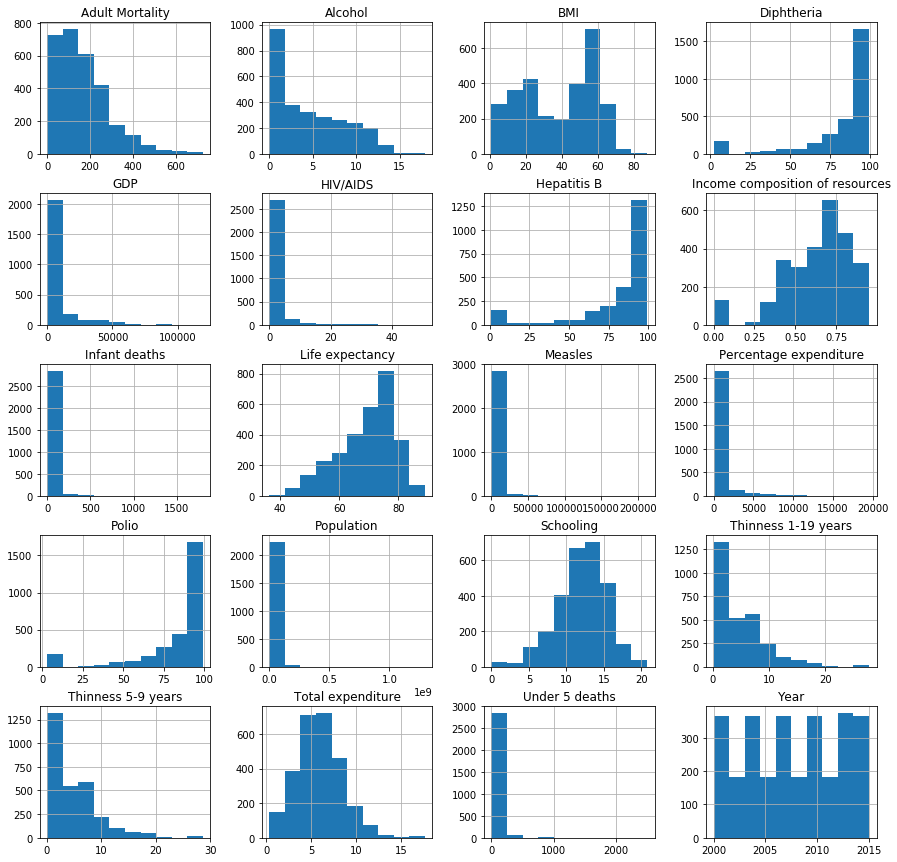

In [9]:
dataset.hist(figsize = (15, 15))
plt.show()

In [10]:
country_list = dataset.Country.unique()
fill_list = dataset.columns

In [11]:
for country in country_list:
    dataset.loc[dataset['Country'] == country,fill_list] = dataset.loc[dataset['Country'] == country,fill_list].interpolate()

In [12]:
dataset['Life expectancy'].fillna(value = dataset['Life expectancy'].mean(), inplace = True)

In [13]:
dataset['Adult Mortality'].fillna(value = dataset['Adult Mortality'].mean(), inplace = True)

In [14]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
Infant deaths                        0
Alcohol                            193
Percentage expenditure               0
Hepatitis B                        144
Measles                              0
BMI                                 34
Under 5 deaths                       0
Polio                                0
Total expenditure                  211
Diphtheria                           0
HIV/AIDS                             0
GDP                                422
Population                         652
Thinness 1-19 years                 34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

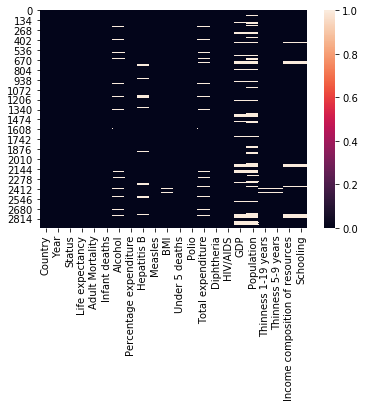

In [15]:
sns.heatmap(dataset.isnull())

Here, clearly you can see there are many NaN values in the dataset, one option is to remove NaN values but that will make the dataset short and model will not have enough data to learn from it, the other option is to fill NaN values using statistical measures, but the number of missing values is high so i choosed to fill them manually by visualising.

So, i observe the correlation between missing value columns.

In [16]:
dataset.corr()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under 5 deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.052905,0.031400,0.242109,-0.082493,0.108974,-0.042937,0.102989,0.093084,0.142166,-0.139741,0.104154,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.403917,0.381791,0.318249,-0.157574,0.564466,-0.222503,0.459154,0.223390,0.473822,-0.556457,0.461845,-0.021548,-0.476561,-0.470977,0.724631,0.748263
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.195401,-0.242814,-0.179739,0.031174,-0.384806,0.094135,-0.272913,-0.120987,-0.274016,0.523727,-0.297799,-0.013639,0.302501,0.308053,-0.457530,-0.452380
Infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.115588,-0.085612,-0.219067,0.501128,-0.227279,0.996629,-0.166647,-0.128019,-0.171280,0.025231,-0.108605,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052905,0.403917,-0.195401,-0.115588,1.000000,0.341293,0.093361,-0.051788,0.330193,-0.112320,0.227097,0.297201,0.226985,-0.048786,0.356786,-0.035205,-0.428651,-0.417272,0.449893,0.547308
Percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.341293,1.000000,-0.001774,-0.056596,0.228700,-0.087852,0.148466,0.176126,0.145014,-0.097857,0.899541,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.242109,0.318249,-0.179739,-0.219067,0.093361,-0.001774,1.000000,-0.153612,0.213021,-0.230137,0.489043,0.102095,0.589806,-0.126277,0.069084,-0.086753,-0.164087,-0.176451,0.276944,0.302510
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051788,-0.056596,-0.153612,1.000000,-0.175977,0.507809,-0.132342,-0.104652,-0.138022,0.030899,-0.076599,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.564466,-0.384806,-0.227279,0.330193,0.228700,0.213021,-0.175977,1.000000,-0.237669,0.277707,0.242831,0.276047,-0.243717,0.303357,-0.072301,-0.532025,-0.538911,0.508774,0.546961
Under 5 deaths,-0.042937,-0.222503,0.094135,0.996629,-0.112320,-0.087852,-0.230137,0.507809,-0.237669,1.000000,-0.184507,-0.129699,-0.191611,0.038062,-0.112459,0.544423,0.467789,0.472263,-0.163305,-0.209373


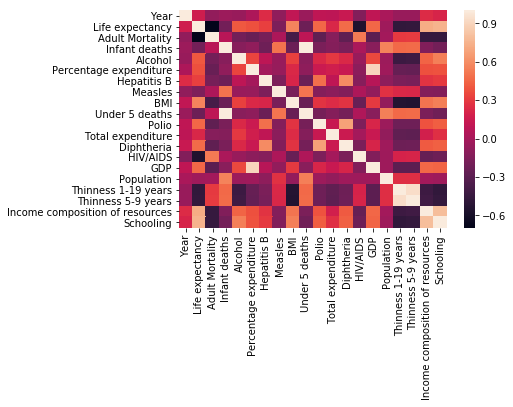

In [17]:
sns.heatmap(dataset.corr())

From the correlation plot and heatmap above, i found that 'Alcohol' which have missing values is related to 'Schooling', so i plotted a scatter plot and made a function manually by observing values of 'Alcohol' at different values of 'Schooling'

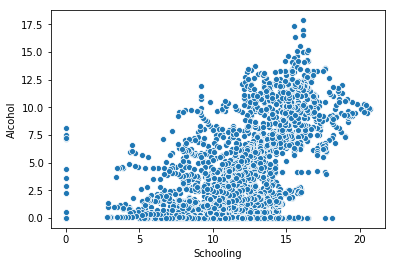

In [18]:
sns.scatterplot(x = 'Schooling', y = 'Alcohol', data = dataset)

In [19]:
dataset[(dataset['Schooling'] > 12.5) & (dataset['Schooling'] <= 15)].Alcohol.mean()

5.202121418826743

In [20]:
dataset[dataset['Schooling'] > 15].Alcohol.mean()

9.003965141612209

In [21]:
def impute_alcohol(cols):
    alcohol = cols[0]
    school = cols[1]
    if pd.isnull(alcohol):
        if school <= 2.5:
            return 3.5
        elif 2.5 < school <= 5:
            return 1.5
        elif 5 < school <= 7.5:
            return 1.3
        elif 7.5 < school <= 10:
            return 2.4
        elif 10 < school <= 12.5:
            return 3.2
        elif 12.5 < school <= 15:
            return 5.2
        else:
            return 9
    else:
        return alcohol

In [22]:
dataset['Alcohol'] = dataset[['Alcohol', 'Schooling']].apply(impute_alcohol, axis = 1)

In [23]:
dataset['Alcohol'].isnull().sum()

0

Clearly after this the NaN values of 'Alcohol' were filled with some useful values

The same step is repeated with other columns/Attributes as well

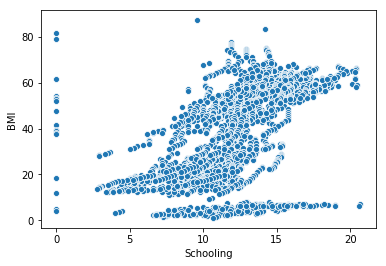

In [24]:
sns.scatterplot(x = 'Schooling', y = 'BMI', data = dataset)

In [25]:
dataset[(dataset['Schooling'] > 15) & (dataset['Schooling'] <= 17.5)].BMI.mean()

51.93349397590363

In [26]:
dataset[dataset['Schooling'] > 17.5].BMI.mean()

55.301234567901254

In [27]:
def imute_bmi(cols):
    bmi = cols[0]
    school = cols[1]
    if pd.isnull(bmi):
        if school <= 2.5:
            return 42
        elif 2.5 < school <= 5:
            return 15.7
        elif 5 < school <= 7.5:
            return 18.3
        elif 7.5 < school <= 10:
            return 22.7
        elif 10 < school <= 12.5:
            return 34.8
        elif 12.5 < school <= 15:
            return 47.6
        elif 15 < school <= 17.5:
            return 52
        else:
            return 55.3
    else:
        return bmi

In [28]:
dataset['BMI'] = dataset[['BMI', 'Schooling']].apply(imute_bmi, axis = 1)

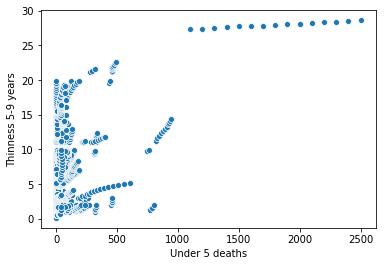

In [29]:
sns.scatterplot(x = 'Under 5 deaths', y = 'Thinness 5-9 years', data = dataset)

In [30]:
dataset[(dataset['Under 5 deaths'] > 700) & (dataset['Under 5 deaths'] <= 1000)]['Thinness 5-9 years'].mean()

10.36875

In [31]:
dataset[(dataset['Under 5 deaths'] > 1000)]['Thinness 5-9 years'].mean()

27.94375

In [32]:
def imute_thin5(cols):
    thin = cols[0]
    death = cols[1]
    if pd.isnull(thin):
        if death <= 100:
            return 4.5
        elif 100 < death <= 200:
            return 7.8
        elif 200 < death <= 300:
            return 5.5
        elif 300 < death <= 400:
            return 8.7
        elif 400 < death <= 500:
            return 14.2
        elif 500 < death <= 700:
            return 5
        elif 700 < death <= 1000:
            return 10.3
        else:
            return 28
    else:
        return thin

In [33]:
dataset['Thinness 5-9 years'] = dataset[['Thinness 5-9 years', 'Under 5 deaths']].apply(imute_thin5, axis = 1)

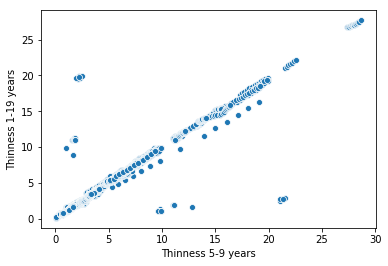

In [34]:
sns.scatterplot(x = 'Thinness 5-9 years', y = 'Thinness 1-19 years', data = dataset)

In [35]:
dataset[(dataset['Thinness 5-9 years'] > 22.5) & (dataset['Thinness 5-9 years'] <= 25)]['Thinness 1-19 years'].mean()

22.2

In [36]:
dataset[dataset['Thinness 5-9 years'] > 22.5]['Thinness 1-19 years'].mean()

26.81176470588235

In [37]:
def imute_thin1(cols):
    thin1 = cols[0]
    thin5 = cols[1]
    if pd.isnull(thin1):
        if thin5 <= 2.5:
            return 1.5
        elif 2.5 < thin5 <= 5:
            return 3.6
        elif 5 < thin5 <= 7.5:
            return 6.5
        elif 7.5 < thin5 <= 10:
            return 8.1
        elif 10 < thin5 <= 12.5:
            return 11.1
        elif 12.5 < thin5 <= 15:
            return 13.5
        elif 15 < thin5 <= 17.5:
            return 15.6
        elif 17.5 < thin5 <= 20:
            return 18.25
        elif 20 < thin5 <= 22.5:
            return 13
        elif 22.5 < thin5 <= 25:
            return 22.2
        else:
            return 26.9
    else:
        return thin1

In [38]:
dataset['Thinness 1-19 years'] = dataset[['Thinness 1-19 years', 'Thinness 5-9 years']].apply(imute_thin1, axis = 1)

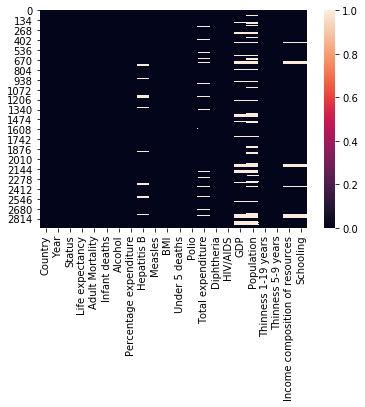

In [39]:
sns.heatmap(dataset.isnull())

In [40]:
dataset.corr()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under 5 deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.031179,0.031400,0.242109,-0.082493,0.105865,-0.042937,0.102989,0.093084,0.142166,-0.139741,0.104154,0.016969,-0.050036,-0.052301,0.243468,0.209400
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.413015,0.381791,0.318249,-0.157574,0.562637,-0.222503,0.459154,0.223390,0.473822,-0.556457,0.461845,-0.021548,-0.469955,-0.466709,0.724631,0.748263
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.204371,-0.242814,-0.179739,0.031174,-0.384988,0.094135,-0.272913,-0.120987,-0.274016,0.523727,-0.297799,-0.013639,0.298288,0.305649,-0.457530,-0.452380
Infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.117195,-0.085612,-0.219067,0.501128,-0.227960,0.996629,-0.166647,-0.128019,-0.171280,0.025231,-0.108605,0.556801,0.465477,0.471396,-0.145139,-0.193720
Alcohol,-0.031179,0.413015,-0.204371,-0.117195,1.000000,0.331997,0.103881,-0.053051,0.339217,-0.114447,0.233599,0.298551,0.232923,-0.054496,0.359931,-0.034071,-0.425893,-0.416708,0.457365,0.548259
Percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.331997,1.000000,-0.001774,-0.056596,0.229603,-0.087852,0.148466,0.176126,0.145014,-0.097857,0.899541,-0.025662,-0.250565,-0.252808,0.381952,0.389687
Hepatitis B,0.242109,0.318249,-0.179739,-0.219067,0.103881,-0.001774,1.000000,-0.153612,0.215181,-0.230137,0.489043,0.102095,0.589806,-0.126277,0.069084,-0.086753,-0.161898,-0.175526,0.276944,0.302510
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.053051,-0.056596,-0.153612,1.000000,-0.175555,0.507809,-0.132342,-0.104652,-0.138022,0.030899,-0.076599,0.265966,0.225143,0.221246,-0.129568,-0.137225
BMI,0.105865,0.562637,-0.384988,-0.227960,0.339217,0.229603,0.215181,-0.175555,1.000000,-0.238571,0.279415,0.241631,0.277379,-0.241575,0.305118,-0.072318,-0.529722,-0.537458,0.501060,0.535496
Under 5 deaths,-0.042937,-0.222503,0.094135,0.996629,-0.114447,-0.087852,-0.230137,0.507809,-0.238571,1.000000,-0.184507,-0.129699,-0.191611,0.038062,-0.112459,0.544423,0.467523,0.472326,-0.163305,-0.209373


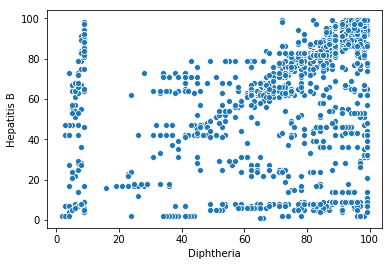

In [41]:
sns.scatterplot(x = 'Diphtheria', y = 'Hepatitis B', data = dataset)

In [42]:
dataset[(dataset['Diphtheria'] > 80) & (dataset['Diphtheria'] <= 90)]['Hepatitis B'].mean()

76.03870967741935

In [43]:
dataset[(dataset['Diphtheria'] > 90)]['Hepatitis B'].mean()

88.8820078226858

In [44]:
def imute_hepatitis(cols):
    hb = cols[0]
    dip = cols[1]
    if pd.isnull(hb):
        if dip <= 10:
            return 37
        elif 10 < dip <= 20:
            return 16.5
        elif 20 < dip <= 30:
            return 24
        elif 30 < dip <= 40:
            return 41.3
        elif 40 < dip <= 50:
            return 44
        elif 50 < dip <= 60:
            return 45.46
        elif 60 < dip <= 70:
            return 53.9
        elif 70 < dip <= 80:
            return 63.2
        elif 80 < dip <= 90:
            return 76
        else:
            return 88.9
    else:
        return hb

In [45]:
dataset['Hepatitis B'] = dataset[['Hepatitis B', 'Diphtheria']].apply(imute_hepatitis, axis = 1)

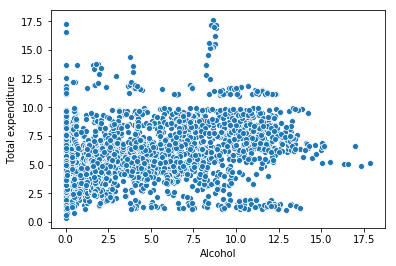

In [46]:
sns.scatterplot(x = 'Alcohol', y = 'Total expenditure', data = dataset)

In [47]:
dataset[(dataset['Alcohol'] > 12.5) & (dataset['Alcohol'] <= 15)]['Total expenditure'].mean()

6.802000000000002

In [48]:
dataset[dataset['Alcohol'] > 15]['Total expenditure'].mean()

5.8136363636363635

In [49]:
def imute_expend(cols):
    expend = cols[0]
    al = cols[1]
    if pd.isnull(expend):
        if al <= 2.5:
            return 5.1
        elif 2.5 < al <= 5:
            return 6
        elif 5 < al <= 7.5:
            return 6.3
        elif 7.5 < al <= 10:
            return 7.2
        elif 10 < al <= 12.5:
            return 7
        elif 12.5 < al <= 15:
            return 6.8
        elif 15 < al <= 17.5:
            return 5.8
    else:
        return expend

In [50]:
dataset['Total expenditure'] = dataset[['Total expenditure', 'Alcohol']].apply(imute_expend, axis = 1)

In [51]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
Infant deaths                        0
Alcohol                              0
Percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
Under 5 deaths                       0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                422
Population                         652
Thinness 1-19 years                  0
Thinness 5-9 years                   0
Income composition of resources    167
Schooling                          163
dtype: int64

In [52]:
dataset.corr()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under 5 deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.031179,0.031400,0.234500,-0.082493,0.105865,-0.042937,0.102989,0.098924,0.142166,-0.139741,0.104154,0.016969,-0.050036,-0.052301,0.243468,0.209400
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.413015,0.381791,0.327604,-0.157574,0.562637,-0.222503,0.459154,0.230295,0.473822,-0.556457,0.461845,-0.021548,-0.469955,-0.466709,0.724631,0.748263
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.204371,-0.242814,-0.190551,0.031174,-0.384988,0.094135,-0.272913,-0.126252,-0.274016,0.523727,-0.297799,-0.013639,0.298288,0.305649,-0.457530,-0.452380
Infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.117195,-0.085612,-0.222478,0.501128,-0.227960,0.996629,-0.166647,-0.128535,-0.171280,0.025231,-0.108605,0.556801,0.465477,0.471396,-0.145139,-0.193720
Alcohol,-0.031179,0.413015,-0.204371,-0.117195,1.000000,0.331997,0.123380,-0.053051,0.339217,-0.114447,0.233599,0.306578,0.232923,-0.054496,0.359931,-0.034071,-0.425893,-0.416708,0.457365,0.548259
Percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.331997,1.000000,0.025674,-0.056596,0.229603,-0.087852,0.148466,0.171772,0.145014,-0.097857,0.899541,-0.025662,-0.250565,-0.252808,0.381952,0.389687
Hepatitis B,0.234500,0.327604,-0.190551,-0.222478,0.123380,0.025674,1.000000,-0.154975,0.221493,-0.233561,0.495473,0.117229,0.595361,-0.131730,0.086250,-0.090469,-0.174711,-0.188227,0.287247,0.310525
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.053051,-0.056596,-0.154975,1.000000,-0.175555,0.507809,-0.132342,-0.104676,-0.138022,0.030899,-0.076599,0.265966,0.225143,0.221246,-0.129568,-0.137225
BMI,0.105865,0.562637,-0.384988,-0.227960,0.339217,0.229603,0.221493,-0.175555,1.000000,-0.238571,0.279415,0.244101,0.277379,-0.241575,0.305118,-0.072318,-0.529722,-0.537458,0.501060,0.535496
Under 5 deaths,-0.042937,-0.222503,0.094135,0.996629,-0.114447,-0.087852,-0.233561,0.507809,-0.238571,1.000000,-0.184507,-0.130705,-0.191611,0.038062,-0.112459,0.544423,0.467523,0.472326,-0.163305,-0.209373


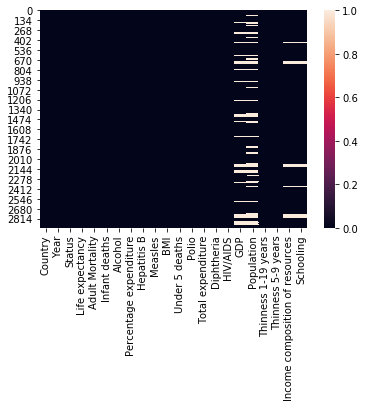

In [53]:
sns.heatmap(dataset.isnull())

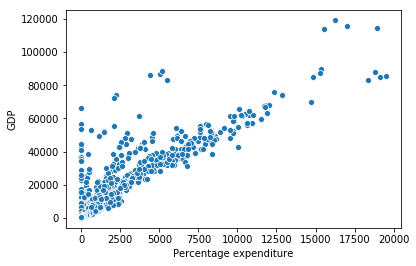

In [54]:
sns.scatterplot(x = 'Percentage expenditure', y = 'GDP' , data = dataset)

In [55]:
dataset[(dataset['Percentage expenditure'] > 10000) & (dataset['Percentage expenditure'] <= 12500)]['GDP'].mean()

61703.763829

In [56]:
dataset[dataset['Percentage expenditure'] > 12500]['GDP'].mean()

93147.58552923077

In [57]:
def imute_gdp(cols):
    gdp = cols[0]
    per = cols[1]
    if pd.isnull(gdp):
        if per <= 1000:
            return 2690.793
        elif 1000 < per <= 2500:
            return 16184.329
        elif 2500 < per <= 3500:
            return 28214.804
        elif 3500 < per <= 5000:
            return 33503.110
        elif 5000 < per <= 7500:
            return 41604.970
        elif 7500 < per <= 10000:
            return 50290.420
        elif 10000 < per <= 12500:
            return 61703.764
        else:
            return 93147.585
    else:
        return gdp

In [58]:
dataset['GDP'] = dataset[['GDP', 'Percentage expenditure']].apply(imute_gdp, axis = 1)

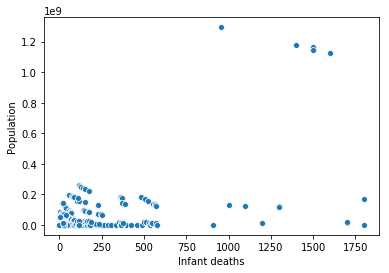

In [59]:
sns.scatterplot(x = 'Infant deaths', y = 'Population', data = dataset)

In [60]:
dataset[(dataset['Infant deaths'] > 1350) & (dataset['Infant deaths'] <= 1650)].Population.mean()

1152978352.25

In [61]:
dataset[dataset['Infant deaths'] > 1650].Population.mean()

50957181.75

In [62]:
def imute_population(cols):
    ppl = cols[0]
    death = cols[1]
    if pd.isnull(ppl):
        if death <= 100:
            return 7695547
        elif 100 < death <= 250:
            return 57794438
        elif 250 < death <= 500:
            return 47424715
        elif 500 < death <= 750:
            return 71838671
        elif 750 < death <= 950:
            return 1395398
        elif 950 < death <= 1350:
            return 275192217
        elif 1350 < death <= 1650:
            return 1152978352
        else:
            return 50957182
    else:
        return ppl

In [63]:
dataset['Population'] = dataset[['Population', 'Infant deaths']].apply(imute_population, axis = 1)

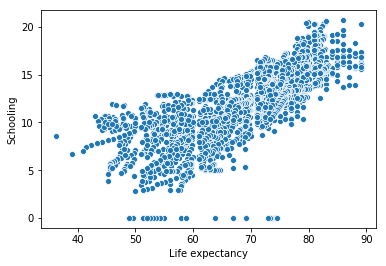

In [64]:
sns.scatterplot(x = 'Life expectancy', y = 'Schooling', data = dataset)

In [65]:
dataset[(dataset['Life expectancy'] > 70) & (dataset['Life expectancy'] <= 80)].Schooling.mean()

13.483435114503811

In [66]:
dataset[dataset['Life expectancy'] > 80].Schooling.mean()

16.510504201680675

In [67]:
def imute_school(cols):
    school = cols[0]
    life = cols[1]
    if pd.isnull(school):
        if life <= 45:
            return 9.13
        elif 45 < life <= 50:
            return 7.95
        elif 50 < life <= 60:
            return 8.21
        elif 60 < life <= 70:
            return 10.54
        elif 70 < life <= 80:
            return 13.48
        else:
            return 16.51
    else:
        return school

In [68]:
dataset['Schooling'] = dataset[['Schooling', 'Life expectancy']].apply(imute_school, axis = 1)

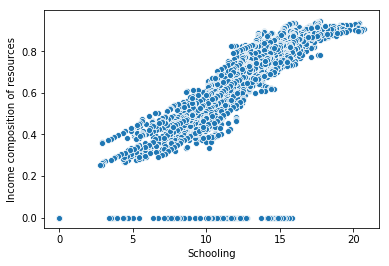

In [69]:
sns.scatterplot(x = 'Schooling', y = 'Income composition of resources', data = dataset)

In [70]:
dataset[(dataset['Schooling'] > 15) & (dataset['Schooling'] <= 17.5)]['Income composition of resources'].mean()

0.8342289156626511

In [71]:
dataset[dataset['Schooling'] > 17.5]['Income composition of resources'].mean()

0.9012962962962964

In [72]:
def imute_resource(cols):
    income = cols[0]
    school = cols[1]
    if pd.isnull(income):
        if school <= 2.5:
            return 0
        elif 2.5 < school <= 5:
            return 0.264
        elif 5 < school <= 7.5:
            return 0.375
        elif 7.5 < school <= 10:
            return 0.448
        elif 10 < school <= 12.5:
            return 0.582
        elif 12.5 < school <= 15:
            return 0.735
        elif 15 < school <= 17.5:
            return 0.834
        else:
            return 0.901
    else:
        return income

In [73]:
dataset['Income composition of resources'] = dataset[['Income composition of resources', 'Schooling']].apply(imute_resource, axis = 1)

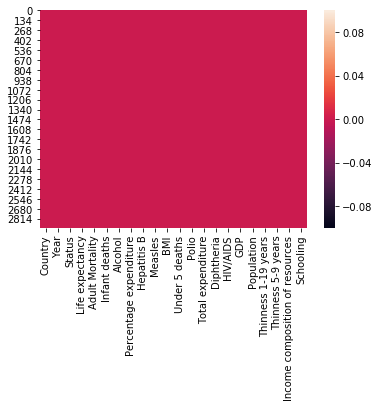

In [74]:
sns.heatmap(dataset.isnull())

In [75]:
dataset.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under 5 deaths                     0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 years                0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

As now all the missing values has been filled now i'll convert the categorical features to dummy variables

In [76]:
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [77]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
dataset['Status'] = le1.fit_transform(dataset['Status'])

In [78]:
dataset[['Status']].head()

,Status
0,1
1,1
2,1
3,1
4,1


In [79]:
le2 = LabelEncoder()
dataset['Country'] = le2.fit_transform(dataset['Country'])

In [80]:
dataset[['Country']].head()

,Country
0,0
1,0
2,0
3,0
4,0


In [81]:
dataset['Country'].nunique()

193

In [82]:
life = dataset['Life expectancy']
dataset.drop(['Life expectancy'], axis = 1, inplace = True)
dataset = pd.concat([dataset, life], axis = 1)

In [83]:
dataset.head()

,Country,Year,Status,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,0,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,0,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,0,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,0,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [84]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [85]:
x

array([[0.000e+00, 2.015e+03, 1.000e+00, ..., 1.730e+01, 4.790e-01,
        1.010e+01],
       [0.000e+00, 2.014e+03, 1.000e+00, ..., 1.750e+01, 4.760e-01,
        1.000e+01],
       [0.000e+00, 2.013e+03, 1.000e+00, ..., 1.770e+01, 4.700e-01,
        9.900e+00],
       ...,
       [1.920e+02, 2.002e+03, 1.000e+00, ..., 1.300e+00, 4.270e-01,
        1.000e+01],
       [1.920e+02, 2.001e+03, 1.000e+00, ..., 1.700e+00, 4.270e-01,
        9.800e+00],
       [1.920e+02, 2.000e+03, 1.000e+00, ..., 1.120e+01, 4.340e-01,
        9.800e+00]])

In [86]:
y

array([65. , 59.9, 59.9, ..., 44.8, 45.3, 46. ])

In [87]:
from sklearn.model_selection import train_test_split as split
x_train, x_test, y_train, y_test = split(x, y, test_size = 0.25, random_state = 0)

In [88]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [89]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, random_state = 0)
forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [90]:
y_pred = forest.predict(x_test)

In [91]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9620348193247198

In [92]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = forest, X = x_train, y = y_train, cv = 10)
print(accuracies)
print("\nAccuracies : {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation : {:.2f}".format(accuracies.std() * 100))

[0.94873339 0.96445758 0.97537582 0.971526   0.95106306 0.96048795
 0.95280682 0.96054556 0.9703191  0.9651365 ]

Accuracies : 96.20 %
Standard Deviation : 0.86


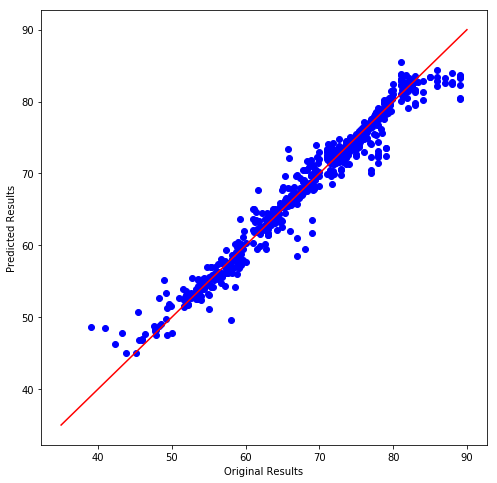

In [93]:
num = [i for i in range(35, 91)]

plt.figure(figsize = (8, 8))
plt.plot(num, num, color = 'red')
plt.scatter(x = y_test, y = y_pred, color = 'blue')
plt.xlabel('Original Results')
plt.ylabel('Predicted Results')
plt.show()

In [94]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [95]:
wml_credentials = {
  "apikey": "XKH3d5fslpfsW7ztAVGaPupK9epRWtFHUBIo3TLmPCe7",
  "instance_id": "cfc1e3d4-7220-4712-a696-5ad9a13c51f0",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [96]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [97]:
metadata={
    client.repository.ModelMetaNames.DESCRIPTION:'life_expectancy_model',
    client.repository.ModelMetaNames.AUTHOR_NAME:'Jatin',
    client.repository.ModelMetaNames.NAME:"RandomForest"
}

In [98]:
model_details=client.repository.store_model(forest,meta_props=metadata)

In [99]:
published_model_uid=client.repository.get_model_uid(model_details)

published_model_uid

'cf196464-c11d-4d75-b910-93c0023b54fe'

In [100]:
created_deployment=client.deployments.create(published_model_uid,name="LifeExpectancy")



#######################################################################################

Synchronous deployment creation for uid: 'cf196464-c11d-4d75-b910-93c0023b54fe' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='d5b3025e-f822-496c-a076-ccad0ef38288'
------------------------------------------------------------------------------------------------




In [101]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint

'https://us-south.ml.cloud.ibm.com/v3/wml_instances/cfc1e3d4-7220-4712-a696-5ad9a13c51f0/deployments/d5b3025e-f822-496c-a076-ccad0ef38288/online'